# Jupyter lab inside Docker container
This tutorial is my effort to work with Jupyter lab in a Docker container interactive session. 

## Prerequisites
* You should know what Jupyter lab is.
* What is a Docker container?

## Get a Docker image
Docker image is a template, like `classes` in Python you can't actually use them, but you can use them to make new instances called `object` in python or `container` in Docker. Likewise you can have the same image for multiple containers.

* List of images on your PC: `docker image ls`

```sh
(base) hell@Dell-Precision-T1600:/$ docker image ls
REPOSITORY                   TAG         IMAGE ID       CREATED         SIZE
jupyter/all-spark-notebook   latest      94d9cd301780   7 days ago      4.58GB
jupyter/minimal-notebook     latest      1f969b467a59   7 days ago      1.46GB
alpine                       latest      c059bfaa849c   3 months ago    5.59MB
modulus                      21.06       90a595b1279a   4 months ago    14.9GB
prakhars962/nvidia_modulus   test        90a595b1279a   4 months ago    14.9GB
hello-world                  latest      feb5d9fea6a5   5 months ago    13.3kB
ibsim/virtuallab             latest      da04b3610585   16 months ago   11.2GB
nvidia/cuda                  11.0-base   2ec708416bb8   19 months ago   122MB
(base) hell@Dell-Precision-T1600:/$ 
```
Here, I have plenty of images. Each image has version control feature in the form of `TAG`. A `TAG` can be any user identifiable string.

# Run a Docker image as container interactively
You can run an interactive session of an image in a container using this command.

`docker container run -it <ImageNAME>:<TAG>`

If I want to run the `modulus` image, I will write the following where `21.06` is the `TAG` as per `docker image ls`.

`docker container run -it modulus:21.06`

By the way, the `modulus` image is the Docker image of Nvidia Modulus.

What is Nvidia-Modulus? See this: https://developer.nvidia.com/modulus

Once you run the container you end up with a different prompt sign as follows:
```sh
(base) hell@Dell-Precision-T1600:/$ docker container run -it modulus:21.06 
                                                                                                                                                
================
== TensorFlow ==
================

NVIDIA Release 21.05-tf1 (build 22596046)
TensorFlow Version 1.15.5

Container image Copyright (c) 2021, NVIDIA CORPORATION.  All rights reserved.
Copyright 2017-2021 The TensorFlow Authors.  All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2021, NVIDIA CORPORATION.  All rights reserved.

Various files include modifications (c) NVIDIA CORPORATION.  All rights reserved.

This container image and its contents are governed by the NVIDIA Deep Learning Container License.
By pulling and using the container, you accept the terms and conditions of this license:
https://developer.nvidia.com/ngc/nvidia-deep-learning-container-license

WARNING: The NVIDIA Driver was not detected.  GPU functionality will not be available.
   Use 'nvidia-docker run' to start this container; see
   https://github.com/NVIDIA/nvidia-docker/wiki/nvidia-docker .

NOTE: MOFED driver for multi-node communication was not detected.
      Multi-node communication performance may be reduced.

NOTE: The SHMEM allocation limit is set to the default of 64MB.  This may be
   insufficient for TensorFlow.  NVIDIA recommends the use of the following flags:
   nvidia-docker run --shm-size=1g --ulimit memlock=-1 --ulimit stack=67108864 ...

root@94724b914c00:/examples# 
```

The prompt `root@94724b914c00:/examples` means that we are a `root` user in a PC named `4724b914c00` and our pwd (present working directory) is `/examples`. This is something we can also setup in our own Docker image while constructing the `Dockerfile`.

Now go to home directory to see if Jupyter is installed.

```sh
root@94724b914c00:~# cd $HOME
root@94724b914c00:~# ls -a
.  ..  .bashrc  .bazelrc  .cache  .config  .gitconfig  .jupyter  .keras  .local  .npm  .profile  .python_history  .viminfo  .wget-hsts  cmake-3.18.2-Linux-x86_64.tar.gz
root@94724b914c00:~# 
```
You can clearly see the Jupyter configuration file is present. Just to double confirm run a jupyter-lab server as follows:
```sh
root@94724b914c00:~# jupyter-lab
[I 22:51:10.116 LabApp] Writing notebook server cookie secret to /root/.local/share/jupyter/runtime/notebook_cookie_secret
2022-03-21 22:51:11.180501: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Deprecation warnings have been disabled. Set TF_ENABLE_DEPRECATION_WARNINGS=1 to re-enable them.
[I 22:51:12.888 LabApp] jupyter_tensorboard extension loaded.
[I 22:51:13.186 LabApp] JupyterLab extension loaded from /usr/local/lib/python3.8/dist-packages/jupyterlab
[I 22:51:13.186 LabApp] JupyterLab application directory is /usr/local/share/jupyter/lab
[I 22:51:13.190 LabApp] [Jupytext Server Extension] NotebookApp.contents_manager_class is (a subclass of) jupytext.TextFileContentsManager already - OK
[I 22:51:13.191 LabApp] Serving notebooks from local directory: /root
[I 22:51:13.191 LabApp] Jupyter Notebook 6.2.0 is running at:
[I 22:51:13.191 LabApp] http://hostname:8888/?token=f9dd69e16ac117a5217856a7396f32f01e64e1093dc2444c
[I 22:51:13.191 LabApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 22:51:13.196 LabApp] 
    
    To access the notebook, open this file in a browser:
        file:///root/.local/share/jupyter/runtime/nbserver-353-open.html
    Or copy and paste this URL:
        http://hostname:8888/?token=f9dd69e16ac117a5217856a7396f32f01e64e1093dc2444c
```

Clearly, the Jupyter-lab server is running. Ofcourse we can't access it as port `8888` is not the same as our local PC's port `8888`. 

## If Jupyter-lab is not installed
If Jupyter-lab is not installed then install Jupyter-lab using `pip install jupyterlab`. If `pip` is not installed then follow some online manual to install pip in the first place.

Remember: When you are installing `jupyter-lab` you are modifying the Docker container. If you want to see the container in action type this in a new terminal `docker container ls`.

```sh
(base) hell@Dell-Precision-T1600:/$ docker container ls
CONTAINER ID   IMAGE           COMMAND                  CREATED          STATUS          PORTS                          NAMES
94724b914c00   modulus:21.06   "/usr/local/bin/nvid…"   15 minutes ago   Up 15 minutes   6006/tcp, 6064/tcp, 8888/tcp   wizardly_lamport
```


Once you are done with installing you can push the container as an image on Docker's website or locally to be able to use them again. I have a seperate tutorial for this in the same repository.

### Back to business
Press ctrl + C to close the Jupyter-lab server. 

## Docker port expose
`docker` has many commands. Here is a list https://docs.docker.com/engine/reference/commandline/run/.

One such command is `--publish` or `-p`. It exposes a container's port(s) to the host/ local machine. Now we just need to run an interactive session with this command and inside the container we can run the Jupyter-lab server. This way we can access it on our local PC.

This Stackoverflow answer was very useful for me:  https://stackoverflow.com/a/48986548/14598633

We run the interactive session as follows:

`docker run -it -p <hostPort>:<containerPort> image:version`

As in port forwarding, the same applies here. The left port is host port and the right one is container's port. Make sure the host's port is available. When the requested host port is not available you will get a message like this depending on the docker version you've installed.

```sh
(base) hell@Dell-Precision-T1600:/$ docker run -it -p 8888:8888 modulus:21.06 
docker: Error response from daemon: driver failed programming external connectivity on endpoint crazy_wescoff (db14fe4ca6411f307b43c6a3f3d7619ef357576041896d84dd918f73f7c38510): Error starting userland proxy: listen tcp4 0.0.0.0:8888: bind: address already in use.
ERRO[0000] error waiting for container: context canceled
```

Otherwise, when host port is free you will successfully enter in the interactive session. Notice I used port `8889` as my hostport.
```sh
(base) hell@Dell-Precision-T1600:/$ docker run -it -p 8889:8888 modulus:21.06 
                                                                                                                                                
================
== TensorFlow ==
================

NVIDIA Release 21.05-tf1 (build 22596046)
TensorFlow Version 1.15.5

Container image Copyright (c) 2021, NVIDIA CORPORATION.  All rights reserved.
Copyright 2017-2021 The TensorFlow Authors.  All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2021, NVIDIA CORPORATION.  All rights reserved.

Various files include modifications (c) NVIDIA CORPORATION.  All rights reserved.

This container image and its contents are governed by the NVIDIA Deep Learning Container License.
By pulling and using the container, you accept the terms and conditions of this license:
https://developer.nvidia.com/ngc/nvidia-deep-learning-container-license

WARNING: The NVIDIA Driver was not detected.  GPU functionality will not be available.
   Use 'nvidia-docker run' to start this container; see
   https://github.com/NVIDIA/nvidia-docker/wiki/nvidia-docker .

NOTE: MOFED driver for multi-node communication was not detected.
      Multi-node communication performance may be reduced.

NOTE: The SHMEM allocation limit is set to the default of 64MB.  This may be
   insufficient for TensorFlow.  NVIDIA recommends the use of the following flags:
   nvidia-docker run --shm-size=1g --ulimit memlock=-1 --ulimit stack=67108864 ...

root@a9fab3b2b4d1:/examples# 
```

Now, before running the Jupyter-lab server make sure you navigate to your directory of your interest. Here, I would run the Jupyter-lab server from `/` to be able to access the whole container. 




# Running the Jupyter-lab server
```sh
root@a9fab3b2b4d1:/examples# cd /
root@a9fab3b2b4d1:/# ls -a
.  ..  .dockerenv  .singularity.d  bin  boot  dev  etc  examples  home  lib  lib32  lib64  libx32  media  mnt  modulus  nvidia  opt  proc  root  run  sbin  srv  sys  tmp  usr  var  workspace
root@a9fab3b2b4d1:/# 
```

Now I can simply run the jupyter with `--no-browser`, `--ip 0.0.0.0` and `--allow-root`. 
* `--no-browser`: by default browser opens after the servers starts. Ofcourse, we will run manually as there is not browser in the container. lol
* `--ip 0.0.0.0`: Any PC in the local network can access the notebook with token/password.
* `--allow-root`; to be able to use `sudo` if needed

We will not set any port for Jupyter-lab server because all port should be free (it is a container), unless you intentionally occupy a port.
 
Inside the interactive session type `jupyter-lab --ip 0.0.0.0 --no-browser --allow-root` and hopefully you will see the Jupyter-lab server running.

```sh
root@a9fab3b2b4d1:/# jupyter-lab --ip 0.0.0.0 --no-browser --allow-root
[I 23:24:59.902 LabApp] Writing notebook server cookie secret to /root/.local/share/jupyter/runtime/notebook_cookie_secret
2022-03-21 23:25:00.816219: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Deprecation warnings have been disabled. Set TF_ENABLE_DEPRECATION_WARNINGS=1 to re-enable them.
[I 23:25:02.042 LabApp] jupyter_tensorboard extension loaded.
[I 23:25:02.327 LabApp] JupyterLab extension loaded from /usr/local/lib/python3.8/dist-packages/jupyterlab
[I 23:25:02.327 LabApp] JupyterLab application directory is /usr/local/share/jupyter/lab
[I 23:25:02.332 LabApp] [Jupytext Server Extension] NotebookApp.contents_manager_class is (a subclass of) jupytext.TextFileContentsManager already - OK
[I 23:25:02.332 LabApp] Serving notebooks from local directory: /
[I 23:25:02.332 LabApp] Jupyter Notebook 6.2.0 is running at:
[I 23:25:02.332 LabApp] http://hostname:8888/?token=ba43c580eb8f57cb45c36317b361d4a5dd09a65d46916bfa
[I 23:25:02.332 LabApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 23:25:02.336 LabApp] 
    
    To access the notebook, open this file in a browser:
        file:///root/.local/share/jupyter/runtime/nbserver-336-open.html
    Or copy and paste this URL:
        http://hostname:8888/?token=ba43c580eb8f57cb45c36317b361d4a5dd09a65d46916bfa


```


# Opening Jupyter-lab in browser

Just copy this link from the output of terminal. `http://hostname:8888/?token=ba43c580eb8f57cb45c36317b361d4a5dd09a65d46916bfa`

And paste it in the Web browser, before pressing enter, replace `hostname` with `localhost` because that link is to access the Jupyter-lab within the interactive session. Also, I used `8889` as my hostport so this should be reflected in the address.

So, you have to type this address in your browser. `http://localhost:8889/?token=ba43c580eb8f57cb45c36317b361d4a5dd09a65d46916bfa`.

Hopefully, you can see the Jupyter-lab.

# Some screenshots
* The contents of `/` in modulus container.

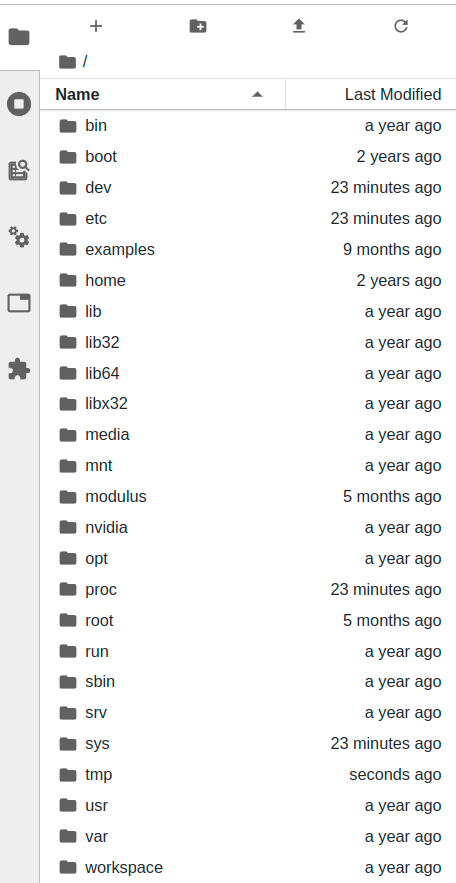

Now you can drag and drop file and play with it.

I noticed one thing that I can't use my local GPU. There should be a wayaround. May be installing a GPU driver. Will update this tutorial soon.